# Lab 01: Getting Started with Quantum Computing (Solution)

This notebook contains the solutions for the Getting Started lab exercises. You can use this as a reference to check your work or to understand the expected implementations for each task.

## Learning Objectives
After completing this lab, you should be able to:
1. Set up a quantum computing environment with Qiskit
2. Create simple quantum circuits
3. Apply basic quantum gates
4. Measure quantum states
5. Execute quantum circuits on simulators
6. Interpret measurement results

## Exercise 1: Setup and Environment Verification

First, let's verify that your quantum computing environment is properly set up by importing the necessary libraries and checking the Qiskit version.

In [1]:
# Import the main Qiskit package
from qiskit import QuantumCircuit, transpile

# Import the Aer simulator backend
from qiskit_aer import Aer

# Import visualization tools
from qiskit.visualization import plot_histogram
import matplotlib.pyplot as plt

# Print the installed Qiskit version
import qiskit
print(f"Qiskit version: {qiskit.__version__}")

# Enable matplotlib inline plotting
%matplotlib inline

Qiskit version: 2.0.0


## Exercise 2: Creating Your First Quantum Circuit

A quantum circuit is a sequence of quantum operations (gates) applied to a set of qubits, followed optionally by measurements.

Let's create a simple quantum circuit with a single qubit and visualize it.

Circuit in text mode:
   
q: 
   

Circuit visualization:


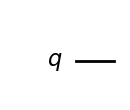

In [2]:
# Create a quantum circuit with 1 qubit
qc = QuantumCircuit(1)

# Draw the circuit in text mode
print("Circuit in text mode:")
print(qc.draw('text'))

# Draw the circuit using matplotlib
print("\nCircuit visualization:")
qc.draw('mpl')

### Understanding the Circuit

The circuit we created has one qubit but doesn't do anything yet. The horizontal line represents the qubit's state over time, moving from left to right.

By default, qubits are initialized in the state |0⟩ (pronounced "ket zero"), which is analogous to a classical bit in state 0.

## Exercise 3: Manipulating a Qubit with Gates

Now, let's apply some quantum operations (gates) to manipulate the state of our qubit.

The Hadamard (H) gate is one of the most fundamental quantum gates. It puts a qubit into a superposition state, giving it equal probability of being measured as either 0 or 1.

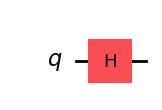

In [3]:
# Create a quantum circuit with 1 qubit
qc_h = QuantumCircuit(1)

# Apply the Hadamard gate to the qubit
qc_h.h(0)

# Visualize the circuit
qc_h.draw('mpl')

## Exercise 4: Measuring a Qubit

In quantum computing, measurement is the process of observing the state of a qubit, which collapses its superposition into a classical state (either 0 or 1).

To record measurement results, we need classical bits in our circuit. These classical bits store the outcomes of the qubit measurements.

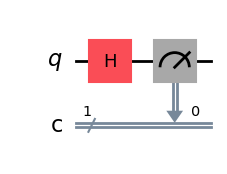

In [4]:
# Create a quantum circuit with 1 qubit and 1 classical bit
qc_measure = QuantumCircuit(1, 1)

# Apply the Hadamard gate to put the qubit in superposition
qc_measure.h(0)

# Measure the qubit and store the result in the classical bit
qc_measure.measure(0, 0)

# Visualize the circuit
qc_measure.draw('mpl')

## Exercise 5: Executing a Quantum Circuit

So far, we've only created circuit diagrams without actually running them. Now, let's execute our quantum circuit on a simulator and observe the results.

Measurement results: {'1': 528, '0': 496}


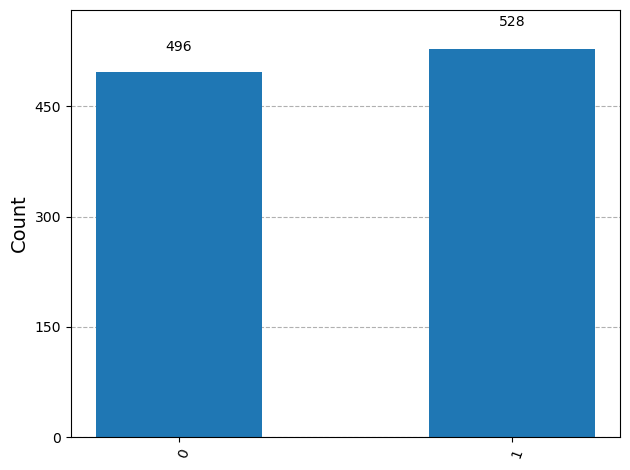

In [5]:
# Define your circuit (reusing from the previous exercise or create a new one)
circuit = QuantumCircuit(1, 1)
circuit.h(0)      # Apply Hadamard gate
circuit.measure(0, 0)  # Measure qubit 0 and store result in classical bit 0

# Choose the simulator backend
simulator = Aer.get_backend('qasm_simulator')

# Transpile the circuit for the backend
compiled_circuit = transpile(circuit, simulator)

# Execute the circuit with 1024 shots
job = simulator.run(compiled_circuit, shots=1024)

# Get the results
result = job.result()
counts = result.get_counts(circuit)

# Display the results
print("Measurement results:", counts)

# Create a bar chart showing the distribution of measurement outcomes
plot_histogram(counts)

### Understanding the Results

When we put a qubit in superposition using the Hadamard gate and then measure it, quantum theory predicts we should get approximately 50% |0⟩ and 50% |1⟩ outcomes.

The histogram shows the distribution of measurement results. Since quantum measurement is probabilistic, you should see roughly equal counts for 0 and 1 (though there will be some statistical variation).

## Exercise 6: Multi-Qubit Circuit

Let's extend our knowledge to a circuit with two qubits. This will allow us to explore more interesting quantum behaviors.

Measurement results: {'11': 269, '00': 279, '01': 241, '10': 235}


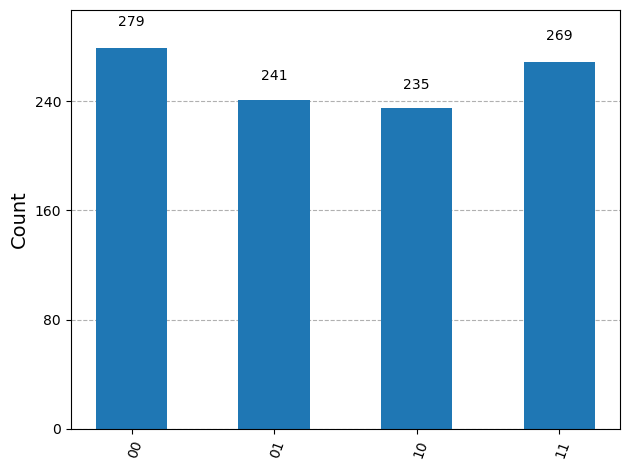

In [6]:
# Create a quantum circuit with 2 qubits and 2 classical bits
qc_2qubits = QuantumCircuit(2, 2)

# Apply Hadamard gates to both qubits
qc_2qubits.h(0)
qc_2qubits.h(1)

# Measure both qubits
qc_2qubits.measure([0, 1], [0, 1])

# Visualize the circuit
qc_2qubits.draw('mpl')

# Execute the circuit on the simulator
simulator = Aer.get_backend('qasm_simulator')
compiled_circuit = transpile(qc_2qubits, simulator)
job = simulator.run(compiled_circuit, shots=1024)
result = job.result()
counts = result.get_counts(qc_2qubits)

# Display the results
print("Measurement results:", counts)

# Create a bar chart showing the distribution of measurement outcomes
plot_histogram(counts)

### Understanding Multi-Qubit Results

With two qubits, each in superposition, we expect to see four possible measurement outcomes: 00, 01, 10, and 11, each with approximately 25% probability.

This demonstrates how the number of possible states grows exponentially with the number of qubits - a key property that gives quantum computers their potential computational power.

## Challenge Exercise: Creating a Bell State

A Bell state is a maximally entangled quantum state of two qubits. Entanglement is a unique quantum phenomenon where qubits become correlated in such a way that the state of one qubit cannot be described independently of the other.

Bell state measurement results: {'11': 502, '00': 522}


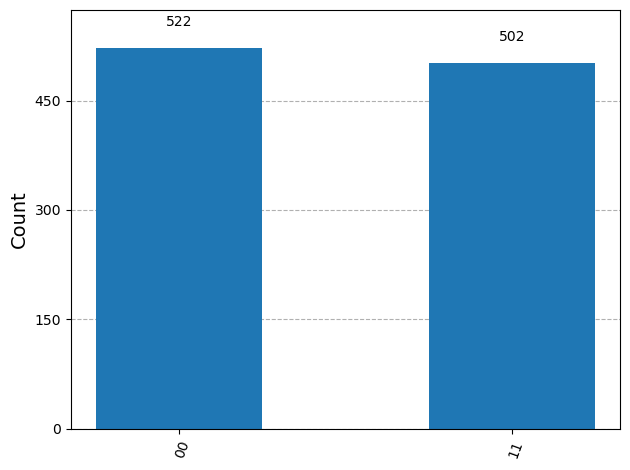

In [7]:
# Create a Bell state circuit
bell_circuit = QuantumCircuit(2, 2)

# Apply Hadamard gate to the first qubit
bell_circuit.h(0)

# Apply CNOT gate (controlled-X)
bell_circuit.cx(0, 1)

# Add measurements
bell_circuit.measure([0, 1], [0, 1])

# Draw the circuit
bell_circuit.draw('mpl')

# Execute the circuit
simulator = Aer.get_backend('qasm_simulator')
compiled_circuit = transpile(bell_circuit, simulator)
job = simulator.run(compiled_circuit, shots=1024)
result = job.result()
counts = result.get_counts(bell_circuit)

# Display the results
print("Bell state measurement results:", counts)

# Plot the histogram
plot_histogram(counts)

### Understanding Bell States

In the Bell state you've created, the two qubits are entangled. If you measure the first qubit and get 0, the second qubit will also be 0. Similarly, if you measure the first qubit and get 1, the second qubit will also be 1.

This perfect correlation is a signature of quantum entanglement and doesn't exist in classical systems. Your histogram should show roughly equal probabilities for states |00⟩ and |11⟩, with little or no occurrences of |01⟩ or |10⟩.

## Reflection Questions

1. What is the difference between a classical bit and a qubit?
   - **Answer**: A classical bit can only be in state 0 or 1. A qubit, however, can be in state |0⟩, |1⟩, or any quantum superposition of these states, represented as α|0⟩ + β|1⟩ where α and β are complex numbers such that |α|² + |β|² = 1.

2. What does the Hadamard gate do to a qubit?
   - **Answer**: The Hadamard gate puts a qubit into an equal superposition state. If applied to |0⟩, it results in the state (|0⟩ + |1⟩)/√2, meaning the qubit has equal probability of being measured as 0 or 1.

3. Why do we get probabilistic results when measuring qubits in superposition?
   - **Answer**: According to quantum mechanics, a measurement forces the qubit to collapse from its superposition state to one of the basis states (|0⟩ or |1⟩). The probability of measuring a particular outcome is determined by the amplitudes in the superposition state. For a qubit in equal superposition, we get 0 or 1 with 50% probability each.

4. How would you describe quantum entanglement based on the Bell state experiment?
   - **Answer**: Quantum entanglement is a phenomenon where two or more qubits become correlated in such a way that the quantum state of each qubit cannot be described independently of the others. In the Bell state experiment, we observed that measuring one qubit immediately determined the state of the other, regardless of the distance between them. This demonstrates the "spooky action at a distance" that Einstein was concerned about in quantum mechanics.

5. What surprised you most in this lab?
   - **Answer**: Answers will vary by student, but common responses include: the probabilistic nature of quantum measurements, the ability to create superposition with just a single gate operation, the perfect correlation observed in entangled states, or how simple circuits can demonstrate fundamental quantum properties.

## Summary

Congratulations! In this lab, you have:
- Created your first quantum circuits
- Applied basic quantum gates (H, CNOT)
- Measured qubits and analyzed the results
- Observed fundamental quantum properties like superposition and entanglement

These concepts form the foundation of quantum computing, and you'll build upon them in the upcoming labs.